[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sandy-lee29/data-viz-with-python/blob/main/Amounts_Proportions.ipynb)

# 📊 Comprehensive Guide to Data Visualization with Pandas & Seaborn & Matplotlib

##🔹 What You'll Learn <br>
✅ Bar Charts (grouped, stacked bars), Pie Charts <br>
✅ Tables and Heatmaps

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {"figure.figsize": [8, 8], "figure.dpi": 72})

In [ ]:
import pandas as pd

gapminder = pd.read_csv("gapminder.tsv", sep="\t")
print(gapminder.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [ ]:
gm_2007 = gapminder[gapminder.year == 2007]
europe_2007 = gm_2007[gm_2007.continent == "Europe"]

### ✅ Bar Plot
 First, we'll compare the populations of the European countries in 2007. It's often most useful to sort the bars in order of size, especially in a situation like this when there are many categories, to make it easier to see the rank order. The easiest way to do this is to sort the dataframe.


<Axes: xlabel='pop', ylabel='country'>

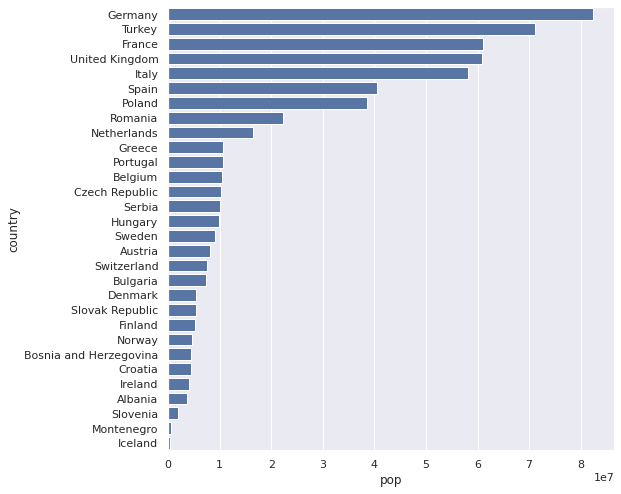

In [ ]:
sns.barplot(europe_2007.sort_values(by='pop', ascending=False), x="pop", y="country")

Let's now look at a situation where the data has to be aggregated. Say we want to compare the total populations of the different continents.  It is clearer to first aggregate the data (into a new dataframe) before plotting it.

[Text(0, 0, '3,811,953,827'),
 Text(0, 0, '929,539,692'),
 Text(0, 0, '898,871,184'),
 Text(0, 0, '586,098,529'),
 Text(0, 0, '24,549,947')]

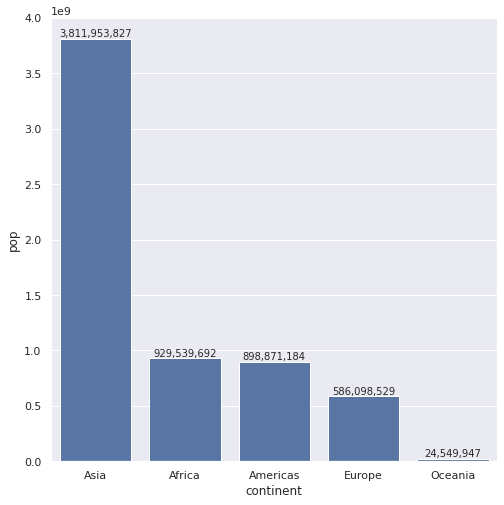

In [ ]:
pop_by_continent = gm_2007.groupby("continent")["pop"].sum().reset_index()
pop_by_continent = pop_by_continent.sort_values(by='pop', ascending=False)
#  You can go on to add labels directly to each bar
ax = sns.barplot(data=pop_by_continent, x="continent", y="pop")
ax.bar_label(ax.containers[0], fontsize=10, fmt='{:,.0f}'.format)

### ✅ Grouped Bar Charts
This kind of chart allows comparison of a subcategory, both within and across categories. For example, within each continent, we might want to compare the population in 1952 (the earliest year in the dataset) and 2007 (the most recent).

We'll create another aggregation of the original data frame to add a subcategory for year, and use the hue parameter to specify that we want to color the bars by year.

In [ ]:
pop_by_continent_and_year = gapminder[(gapminder.year == 1952) | (gapminder.year == 2007)].groupby(["continent", "year"])["pop"].sum().reset_index()
pop_by_continent_and_year

,continent,year,pop
0,Africa,1952,237640501
1,Africa,2007,929539692
2,Americas,1952,345152446
3,Americas,2007,898871184
4,Asia,1952,1395357351
5,Asia,2007,3811953827
6,Europe,1952,418120846
7,Europe,2007,586098529
8,Oceania,1952,10686006
9,Oceania,2007,24549947


<Axes: xlabel='continent', ylabel='pop'>

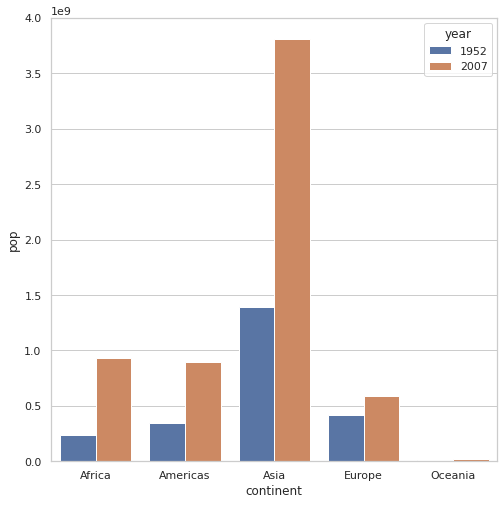

In [ ]:
sns.barplot(pop_by_continent_and_year, x="continent", y="pop", hue="year", palette = "deep")

What if you wanted to switch the category and subcategory, so that the main grouping is by year, broken down by continent?

<Axes: xlabel='year', ylabel='pop'>

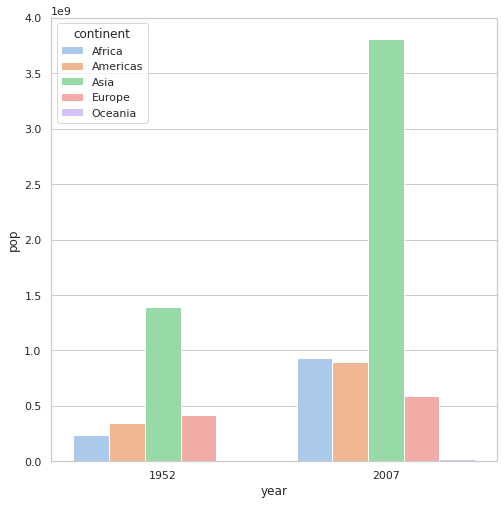

In [ ]:
sns.barplot(pop_by_continent_and_year, x="year", y="pop", hue="continent", palette = 'pastel')

### ✅ Stacked Bar Charts
Stacked charts can be useful when we want to show how different subcategories contribute to the total size of a bar. For example, to see how the populations of the different continents contribute to the change in world population from 1952 to 2007.

These charts can also be confusing, however, and this chart type is not supported directly by Seaborn. We have to turn to Pandas + Matplotlib, which means we have to pivot our data from long format to wide format.

Once the data is in wide format, it's very easy to make a basic chart, using the Pandas + Matplotlib syntax of calling `plot.bar()` on the wide data frame. By default this produces a grouped bar chart similar to one we made with Seaborn. (Note that we have to add a y-axis label.)

Text(0, 0.5, 'Population')

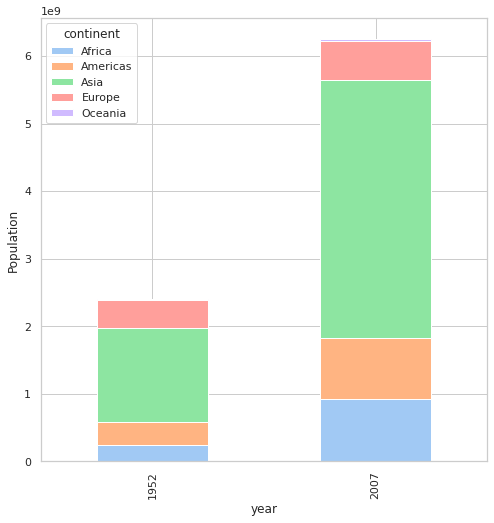

In [ ]:
pop_by_continent_and_year_wide = pop_by_continent_and_year.pivot(columns="continent", index="year", values="pop")
pop_by_continent_and_year_wide

pop_by_continent_and_year_wide.plot.bar(stacked=True)
plt.ylabel("Population")

The stacked chart focuses on the comparison of world population from 1952 to 2007, with the breakdown by continent as a secondary consideration. It would be less useful if comparison between continents across time was important, because the continents higher in the stack don't have a common baseline.

### ✅ Pie Chars
- Pie charts offer a way to show how different categories contribute to a whole, as a proportion. They are controversia and Seaborn does not offer them. We can again use the Pandas + Matplotlib interface here. Returning to our subset from 2007, we can use a pie chart to show the proportion of the world's population from each continent. We set the Pandas index as a convenient way to provide the label for each slice.

In [ ]:
pop_by_continent = gm_2007.groupby("continent")["pop"].sum().reset_index()
pop_by_continent.set_index("continent")
pop_by_continent

,continent,pop
0,Africa,929539692
1,Americas,898871184
2,Asia,3811953827
3,Europe,586098529
4,Oceania,24549947


Text(0.5, 1.0, 'Population Distribution by Continent (2007)')

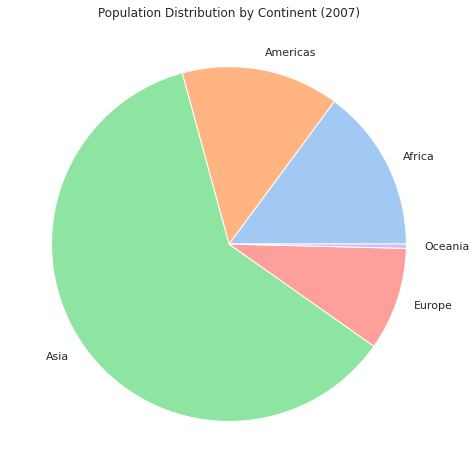

In [ ]:
ax = pop_by_continent.set_index("continent").plot.pie(y="pop", legend=False, ylabel="")
# Add a more descriptive title
ax.set_title("Population Distribution by Continent (2007)")

### ✅ Heat Maps
Using color to encode a continuous variable, with (usually) categorical variables on the axes, perhaps ordered.

Seaborn: heatmap

We first need to create a matrix-like dataframe using pivot.

In [ ]:
lifeExp_by_country_americas = gapminder[gapminder.continent == "Americas"].pivot(columns = "year", index = "country", values = "lifeExp")
lifeExp_by_country_americas

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
Bolivia,40.414,41.890,43.428,45.032,46.714,50.023,53.859,57.251,59.957,62.050,63.883,65.554
Brazil,50.917,53.285,55.665,57.632,59.504,61.489,63.336,65.205,67.057,69.388,71.006,72.390
Canada,68.750,69.960,71.300,72.130,72.880,74.210,75.760,76.860,77.950,78.610,79.770,80.653
Chile,54.745,56.074,57.924,60.523,63.441,67.052,70.565,72.492,74.126,75.816,77.860,78.553
Colombia,50.643,55.118,57.863,59.963,61.623,63.837,66.653,67.768,68.421,70.313,71.682,72.889
Costa Rica,57.206,60.026,62.842,65.424,67.849,70.750,73.450,74.752,75.713,77.260,78.123,78.782
Cuba,59.421,62.325,65.246,68.290,70.723,72.649,73.717,74.174,74.414,76.151,77.158,78.273
Dominican Republic,45.928,49.828,53.459,56.751,59.631,61.788,63.727,66.046,68.457,69.957,70.847,72.235


Text(0.5, 1.0, 'Life expectancy by country, Americas')

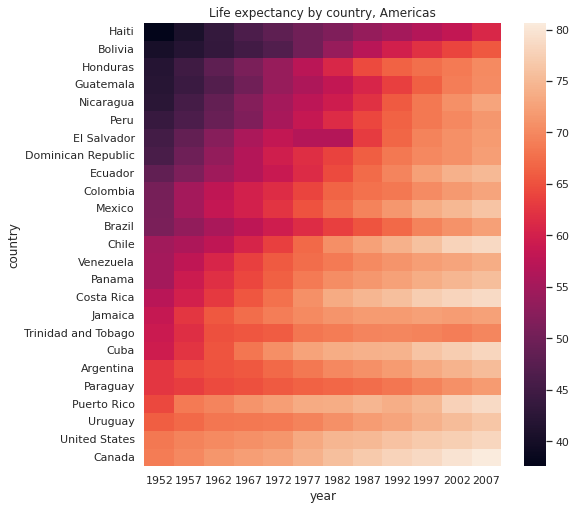

In [ ]:
sns.heatmap(lifeExp_by_country_americas.sort_values(by = 1952))
plt.title("Life expectancy by country, Americas")

<Axes: xlabel='year', ylabel='country'>

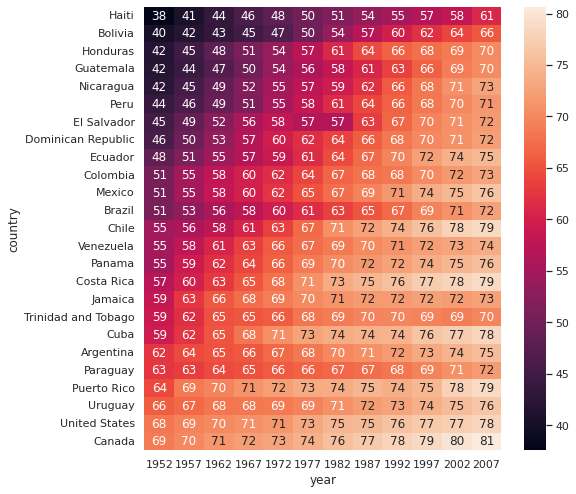

In [ ]:
# Next, we can try adding labels to each cell in the heatmap, showing the value directly.
sns.heatmap(lifeExp_by_country_americas.sort_values(by = 1952), annot=True)